### Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Filters.vertical import dz
from Filters.horizontal import dh, dxdy_conv
from Filters.total import dt
from Filters.tilt import tilt, hyperbolic_tilt

from Monogenic.monogenic import nss_monogenic_signal, pss_monogenic_signal

### Define function to plot outline of geologic features  

Geologic features correspond to the following diagram (Hidalgo-Gato and Barbosa, 2017).

![](figures/Figure_2.jpg)

In [2]:
def plot_edges(size):
    # First Break - Hingeline
    plt.plot([-50, -25], [-15, -15], color='k', linewidth=size,
             linestyle='--')
    plt.plot([-25, -10], [-5, -5], color='k', linewidth=size,
             linestyle='--')
    plt.plot([-25, -25], [-30, 20], color='k', linewidth=size*0.2,
             linestyle='--')
    plt.plot([-10, -10], [-25, 25], color='k', linewidth=size*0.2,
             linestyle='--')
    plt.plot([-10, 10], [0, 0], color='k', linewidth=size,
             linestyle='--')
    plt.plot([10, 10], [-20, 20], color='k', linewidth=size*0.2,
             linestyle='--')
    plt.plot([10, 30], [-3, -3], color='k', linewidth=size,
             linestyle='--')
    plt.plot([30, 30], [-20, 20], color='k', linewidth=size*0.2,
             linestyle='--')
    plt.plot([30, 50], [-5, -5], color='k', linewidth=size,
             linestyle='--')

    # Continental Oceanic Boundary - COB
    plt.plot([-50, -25], [0, 0], color='w', linewidth=size,
             linestyle='--')
    plt.plot([-25, -10], [3, 3], color='w', linewidth=size,
             linestyle='--')
    plt.plot([-10, 10], [12, 12], color='w', linewidth=size,
             linestyle='--')
    plt.plot([10, 30], [15, 15], color='w', linewidth=size,
             linestyle='--')
    plt.plot([30, 50], [10, 10], color='w', linewidth=size,
             linestyle='--')

    # Intrusion
    plt.plot([0, 10], [30, 30], color='r', linewidth=size,
             linestyle='--')
    plt.plot([0, 0], [30, 40], color='r', linewidth=size,
             linestyle='--')
    plt.plot([0, 10], [40, 40], color='r', linewidth=size,
             linestyle='--')
    plt.plot([10, 10], [30, 40], color='r', linewidth=size,
             linestyle='--')

    # Dike
    plt.plot([-50, -0.95], [-35, -10], color='0.35', linewidth=2.5,
             linestyle='--')

### Load data

In [3]:
# Open File "data.dat" and import data
data = np.loadtxt("Monogenic/data.dat")
xp = data[:, 0]
yp = data[:, 1]
zp = data[:, 2]
tf = data[:, 3]

grd_shape = (200, 200)

xp = np.reshape(xp, grd_shape)
yp = np.reshape(yp, grd_shape)
zp = np.reshape(zp, grd_shape)
tf = np.reshape(tf, grd_shape)

### Total Field Anomaly

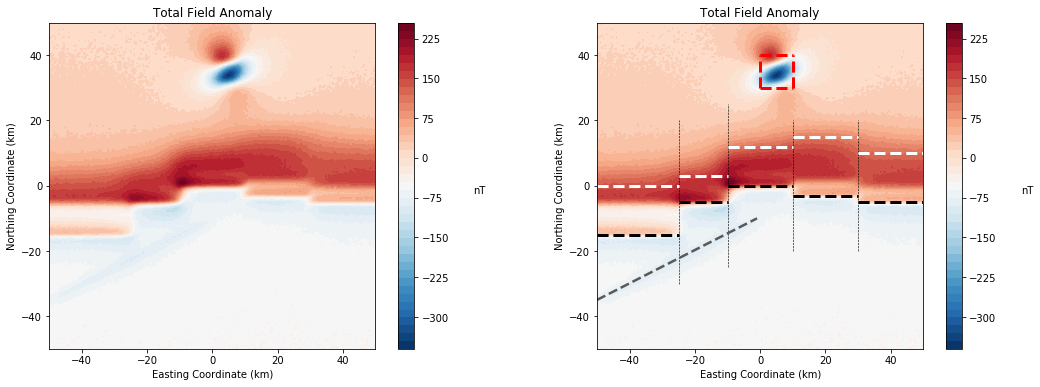

In [16]:
plt.subplots(1, 2, figsize=(18, 6))

# Plotting the total-field anomaly
plt.subplot(121)
plt.title('Total Field Anomaly')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, tf, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("nT", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plt.subplot(122)
plt.title('Total Field Anomaly')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, tf, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("nT", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plot_edges(3)

plt.savefig('figures/TF.png')
plt.show()

### First Vertical Derivative

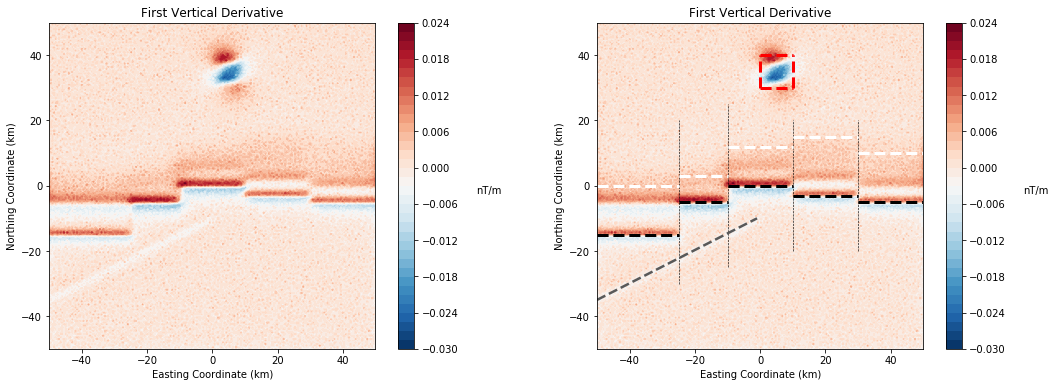

In [15]:
dz1 = dz(tf, xp, yp)

plt.subplots(1, 2, figsize=(18, 6))

# first vertical derivatives
plt.subplot(121)
plt.title('First Vertical Derivative')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, dz1, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("nT/m", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
dz1 = dz(tf, xp, yp)
plt.subplot(122)
plt.title('First Vertical Derivative')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, dz1, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("nT/m", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plot_edges(3)

plt.savefig('figures/dz1.png')
plt.show()

### Second Vertical Derivative

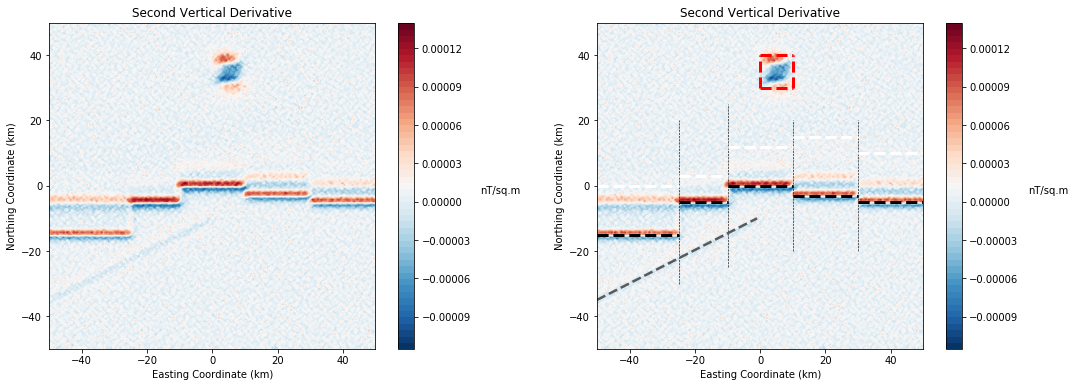

In [17]:
dz2 = dz(tf, xp, yp, 2)

plt.subplots(1, 2, figsize=(18, 6))

# first vertical derivatives
plt.subplot(121)
plt.title('Second Vertical Derivative')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, dz2, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("nT/sq.m", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
dz1 = dz(tf, xp, yp)
plt.subplot(122)
plt.title('Second Vertical Derivative')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, dz2, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("nT/sq.m", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plot_edges(3)

plt.savefig('figures/dz2.png')
plt.show()

### Total Horizontal Derivatives

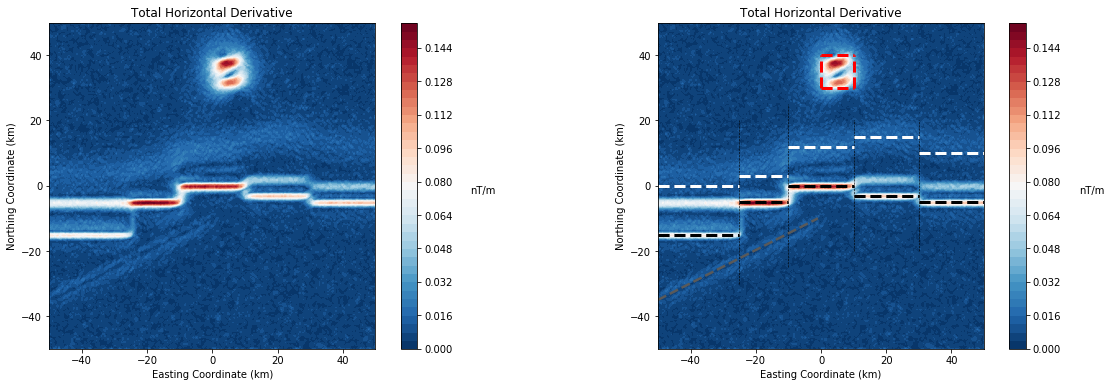

In [18]:
# compute derivatives
dx1, dy1 = dxdy_conv(tf, xp, yp)
thd = dh(tf, xp, yp)

fig = plt.subplots(1, 2, figsize=(20, 6))

# total horizontal derivative
plt.subplot(121)
plt.title('Total Horizontal Derivative')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, thd, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("nT/m", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plt.subplot(122)
plt.title('Total Horizontal Derivative')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, thd, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("nT/m", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plot_edges(3)

plt.savefig('figures/thd.png')
plt.show()

### Total Derivative

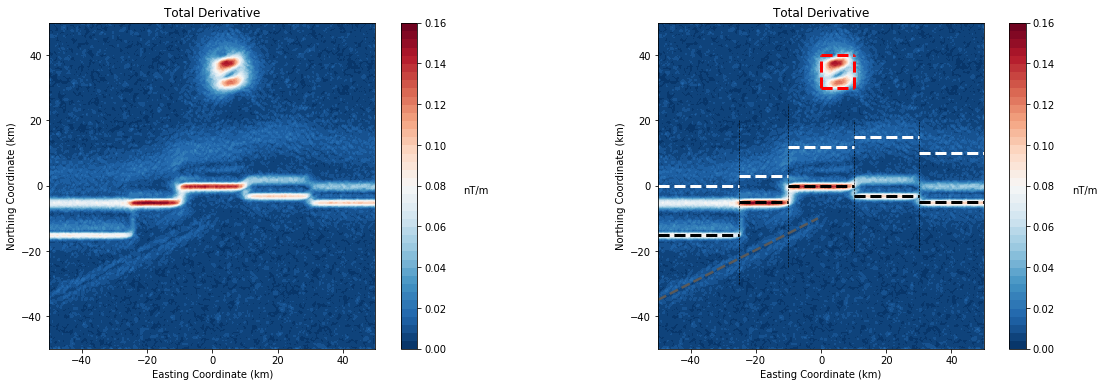

In [19]:
# total derivative
td = dt(tf, xp, yp)

fig = plt.subplots(1, 2, figsize=(20, 6))

# total derivative
plt.subplot(121)
plt.title('Total Derivative')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, td, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("nT/m", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plt.subplot(122)
plt.title('Total Derivative')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, td, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("nT/m", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plot_edges(3)

plt.savefig('figures/td.png')
plt.show()

### Tilt Angle

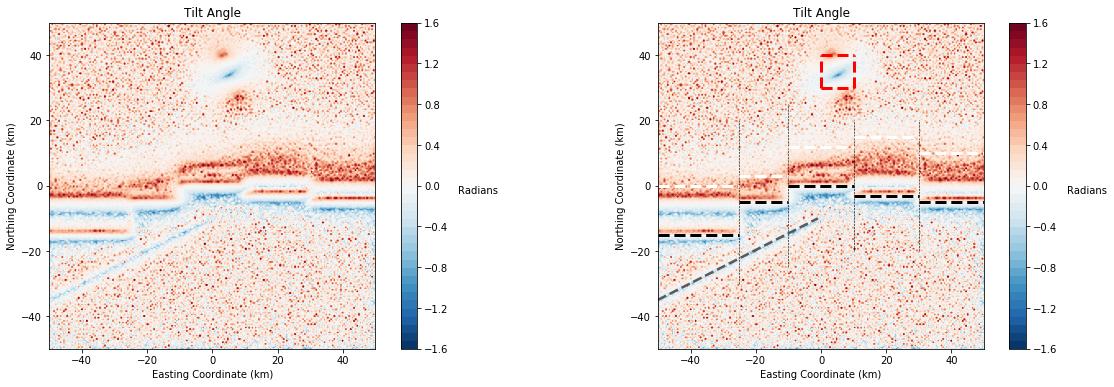

In [20]:
fig = plt.subplots(1, 2, figsize=(20, 6))

# tilt angle
theta = tilt(tf, xp, yp)

# tilt angle
plt.subplot(121)
plt.title('Tilt Angle')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, theta, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("Radians", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plt.subplot(122)
plt.title('Tilt Angle')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, theta, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("Radians", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plot_edges(3)

plt.savefig('figures/tilt.png')
plt.show()

### Hyperbolic Tilt Angle

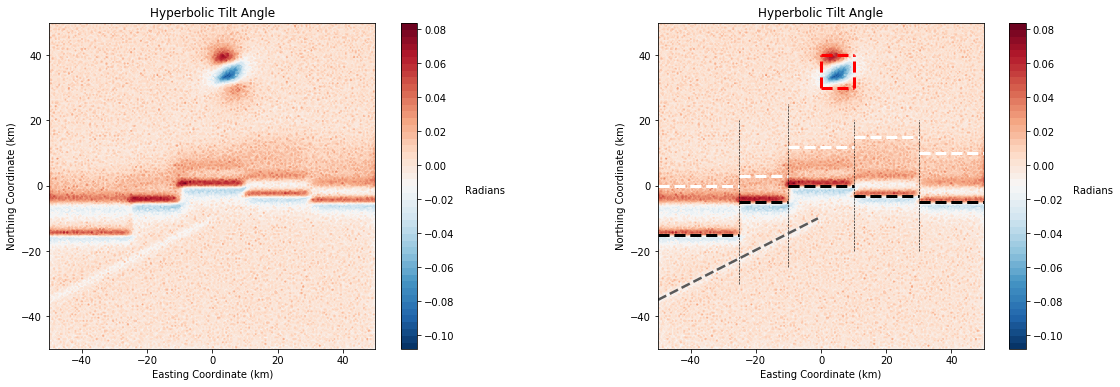

In [21]:
fig = plt.subplots(1, 2, figsize=(20, 6))

# hyperbolic tilt angle
hta = hyperbolic_tilt(tf, xp, yp)

# hyperbolic tilt angle
plt.subplot(121)
plt.title('Hyperbolic Tilt Angle')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, hta, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("Radians", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plt.subplot(122)
plt.title('Hyperbolic Tilt Angle')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, hta, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("Radians", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plot_edges(3)

plt.savefig('figures/hta.png')
plt.show()

### Non-Scale Monogenic Signal

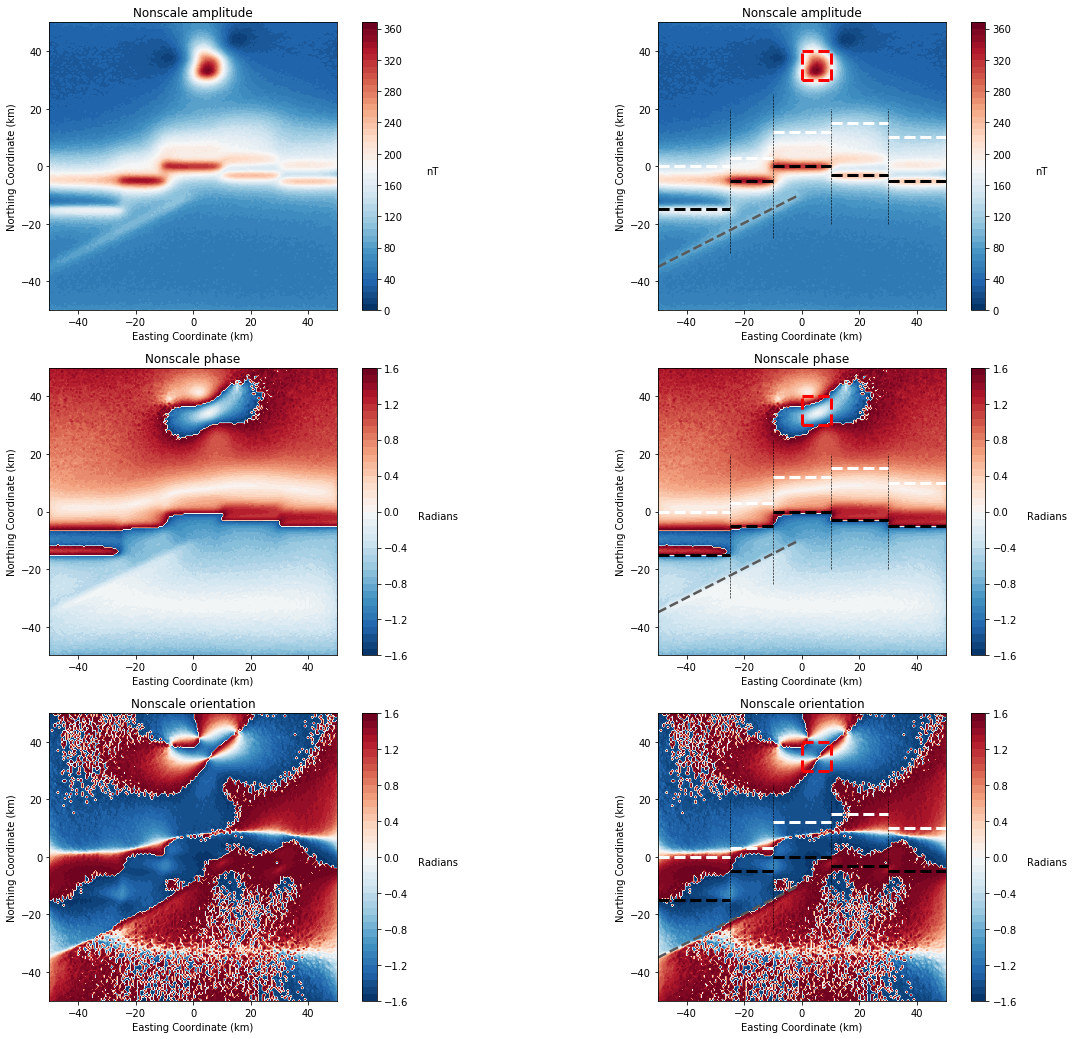

In [22]:
nss_amplitude, nss_phase, nss_orientation = nss_monogenic_signal(xp, yp, tf)

# initialize plot
fig = plt.subplots(3, 2, figsize=(20, 18))

# plot nonscale amplitude
plt.subplot(321)
plt.title('Nonscale amplitude')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, nss_amplitude, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("nT", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plt.subplot(322)
plt.title('Nonscale amplitude')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, nss_amplitude, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("nT", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plot_edges(3)

# plot nonscale phase
plt.subplot(323)
plt.title('Nonscale phase')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, nss_phase, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("Radians", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plt.subplot(324)
plt.title('Nonscale phase')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, nss_phase, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("Radians", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plot_edges(3)

# plot nonscale orientation
plt.subplot(325)
plt.title('Nonscale orientation')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, nss_orientation, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("Radians", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plt.subplot(326)
plt.title('Nonscale orientation')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, nss_orientation, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("Radians", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plot_edges(3)

plt.savefig('figures/nss.png')
plt.show()

### Poisson Scale-Space Monogenic Signal

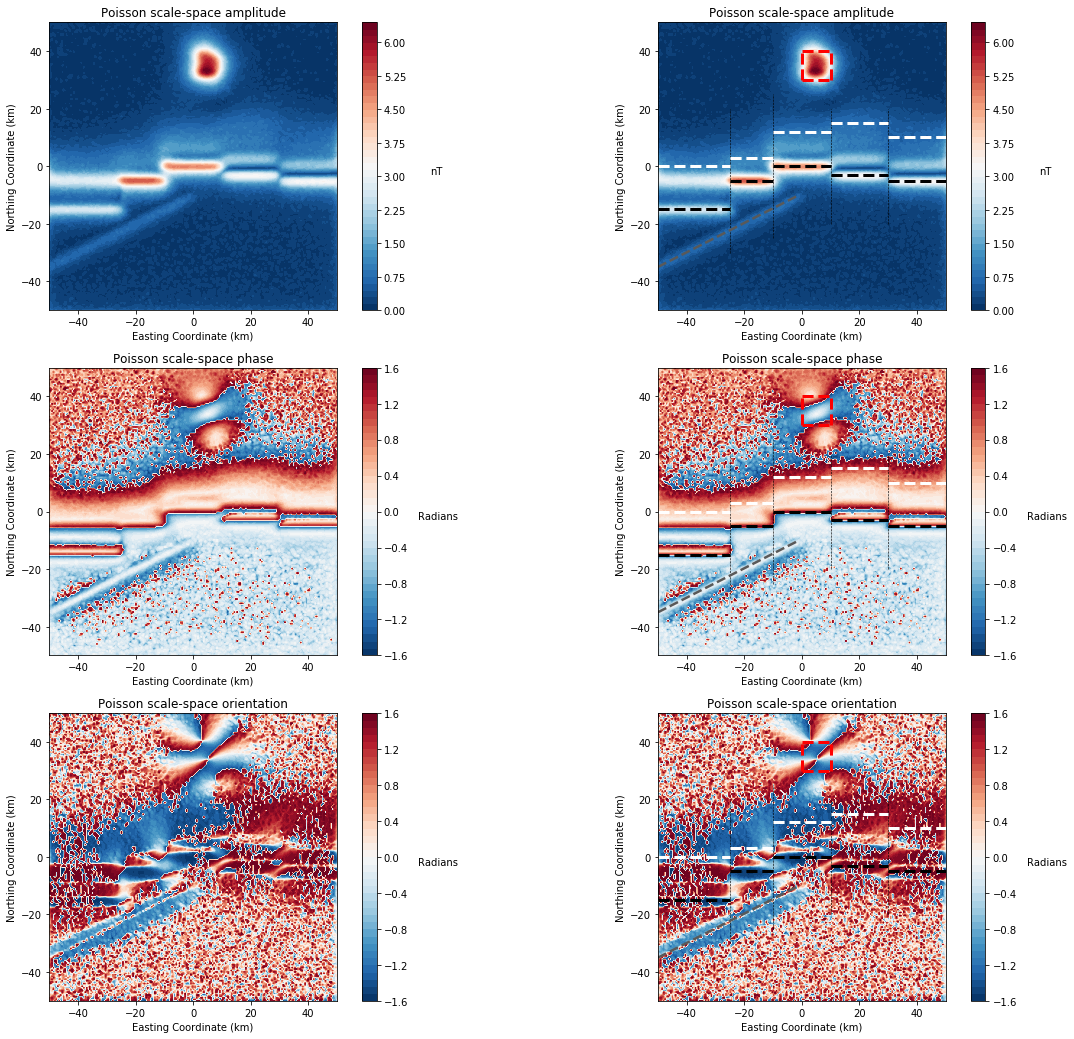

In [23]:
pss_amplitude, pss_phase, pss_orientation = pss_monogenic_signal(xp, yp, tf)

# initialize plot
fig = plt.subplots(3, 2, figsize=(20, 18))

# plot poisson scale-space amplitude
plt.subplot(321)
plt.title('Poisson scale-space amplitude')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, pss_amplitude, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("nT", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plt.subplot(322)
plt.title('Poisson scale-space amplitude')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, pss_amplitude, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("nT", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plot_edges(3)

# plot poisson scale-space phase
plt.subplot(323)
plt.title('Poisson scale-space phase')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, pss_phase, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("Radians", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plt.subplot(324)
plt.title('Poisson scale-space phase')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, pss_phase, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("Radians", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plot_edges(3)

# plot poisson scale-space orientation
plt.subplot(325)
plt.title('Poisson scale-space orientation')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, pss_orientation, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("Radians", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plt.subplot(326)
plt.title('Poisson scale-space orientation')
plt.gca().set_aspect('equal', adjustable='box')
plt.contourf(yp/1000, xp/1000, pss_orientation, 50, cmap=plt.cm.RdBu_r)
cb = plt.colorbar()
cb.set_label("Radians", labelpad=30, rotation=0)
plt.xlabel('Easting Coordinate (km)')
plt.ylabel('Northing Coordinate (km)')
plot_edges(3)

plt.savefig('figures/pss.png')
plt.show()